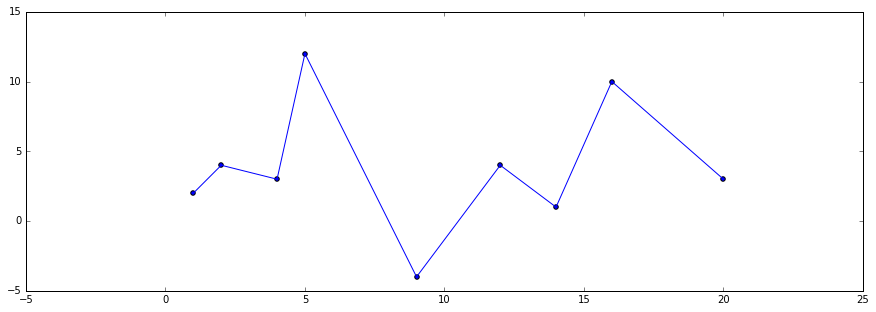

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
poly = np.array([[1,2],
                 [2,4],
                 [4,3],
                 [5,12],
                 [9,-4],
                 [12,4],
                 [14,1],
                 [16,10],
                 [20,3]
                ]);
#poly = poly0
plt.figure(figsize=(15,5))
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])

In [27]:
import math
#from http://mathworld.wolfram.com/Point-LineDistance2-Dimensional.html
def point_line_distance(x0,y0,x1,y1,x2,y2):
    return abs((x2-x1)*(y1-y0)-(x1-x0)*(y2-y1)) / math.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1))

print point_line_distance(1,3,1,2,2,3)
print point_line_distance(0,0,-2,0,0,-2)


0.707106781187
1.41421356237


In [28]:
def douglas_peucker(tolerance,p,mask,start,end,it):
    distances = np.zeros(len(p))
    for i in range(start+1,end):
        distances[i] = point_line_distance(p[i,0],p[i,1],p[start,0],p[start,1],p[end,0],p[end,1])
    more = distances > tolerance
    sum = np.count_nonzero(more)
    if sum > 0:
        maxindex = np.argmax(distances)
        mask[maxindex] = True
        m1 = douglas_peucker(tolerance,p,mask,start,maxindex,it+1)
        m2 = douglas_peucker(tolerance,p,mask,maxindex,end,it+1)
        mask = np.logical_or(mask, m1)
        mask = np.logical_or(mask,m2)
    else:
        for i in range(start+1,end):
            if distances[i] <= tolerance:
                mask[i] = False
    return mask


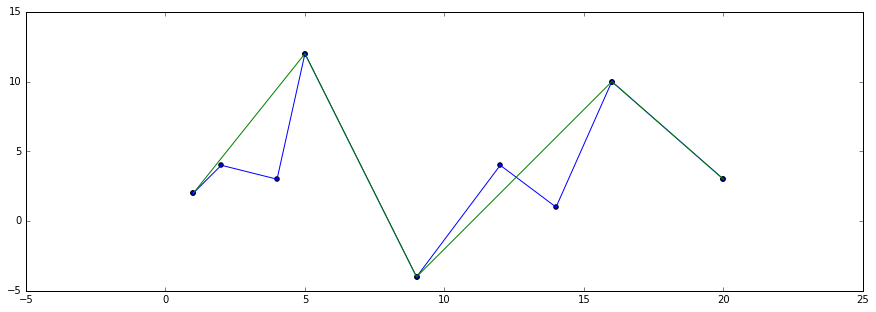

In [35]:
def simplify_douglas_peucker(tolerance,p):
    mask = np.ones(len(poly),dtype='bool')
    return douglas_peucker(tolerance,p,mask,0,len(p)-1,0)
    
mask = simplify_douglas_peucker(5,poly)

simplified = poly[mask]

plt.figure(figsize=(15,5))
plt.plot(poly[:,0],poly[:,1])
plt.scatter(poly[:,0],poly[:,1])
plt.plot(simplified[:,0],simplified[:,1])
plt.scatter(simplified[:,0],simplified[:,1])

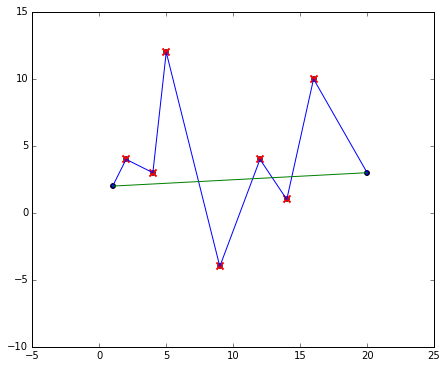

In [37]:
marker = np.array([])
def plotpoly(tolerance):
    mask = simplify_douglas_peucker(tolerance,poly)

    #figure
    fig = plt.figure(figsize=(15,6))
    fig.gca().set_aspect('equal', adjustable='box')

    #the original polygon
    plt.plot(poly[:,0],poly[:,1])
    plt.scatter(poly[:,0],poly[:,1])

    #simplified polygon
    simplified = poly[mask]
    plt.plot(simplified[:,0],simplified[:,1])
    plt.scatter(simplified[:,0],simplified[:,1])

    #deleted points
    deleted = poly[np.logical_not(mask)]
    plt.scatter(deleted[:,0],deleted[:,1],color='red',marker='x',s=50,linewidth=2.0)
    
    #marker depending on step
    if len(marker)>1:
        vec = marker[1]-marker[0]
        len1vec = vec / math.sqrt(np.dot(vec,vec))

        p1 = marker[0] - 1*vec
        p2 = marker[0] + 2*vec
        line = np.array([p1,p2])
        m = plt.Line2D(line[:,0],line[:,1],color='red',linewidth=2.0)
        fig.gca().add_artist(m)

        normvec = np.array([-len1vec[1],len1vec[0]])  
        left = marker[0] + tolerance*normvec
        p1 = left-1*vec
        p2 = left+2*vec
        line = np.array([p1,p2])
        l = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(l)

        right = marker[0] - tolerance*normvec
        p1 = right-1*vec
        p2 = right+2*vec
        line = np.array([p1,p2])
        r = plt.Line2D(line[:,0],line[:,1],linestyle=':',color='red',linewidth=2.0)
        fig.gca().add_artist(r)


from IPython.html.widgets import *
interact(plotpoly, tolerance=(0,10,0.1),maxdist=(0,12,0.1));